In [1]:
#  ! pip install cufflinks --upgrade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style, colors
# from scipy.stats import binom
# import  statsmodels.stats.multitest as multitest
from scipy.stats import ttest_ind
# import scipy.stats as stats
# import scipy.stats as ss
# import sys
# sys.path.append('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook')
# import sz_toolbox as szt
%matplotlib inline

import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
# cufflinks binds plotly directly to python dataframe
import cufflinks as cf
cf.go_offline()
# Set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
plotly.offline.init_notebook_mode(connected=True)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to enable jupyter ipython widgets run following line at command line
# jupyter nbextension enable --py widgetsnbextension
# to import ipywidgets in jupyter notebook
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

__PIK3CA, differentially expressed, mutated cases have higher expression. HIV negative cases have higher expression__

### RPKMS

In [19]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/118_patient_rpkm.csv'
expr = pd.read_csv(f, index_col='gene').T
expr.shape
expr.head(2)

(118, 51595)

gene,10_PPIB,12_FKBP10,13_CALCA,15_UBE3A,16_ADA,17_AICDA,18_AIRE,1_COL1A1,21_BLNK,22_C1QA,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
HTMCP-03-06-02001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.9183,0.5696,2.6186,7.061,2.0182,0.0,6.8391,39.2288,4.6830,8.7451
HTMCP-03-06-02002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.1353,1.2758,3.2289,4.329,0.2457,0.0,6.4751,79.9902,3.9416,6.7653


### SMGs

In [20]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/smgs_reviewed.txt'
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/smgs_15.txt'
smgs = pd.read_csv(f, header=None)[0].tolist()
smgs[:2]

['PIK3CA', 'MAPK1']

In [21]:
expr.head(2)

gene,10_PPIB,12_FKBP10,13_CALCA,15_UBE3A,16_ADA,17_AICDA,18_AIRE,1_COL1A1,21_BLNK,22_C1QA,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
HTMCP-03-06-02001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.9183,0.5696,2.6186,7.061,2.0182,0.0,6.8391,39.2288,4.6830,8.7451
HTMCP-03-06-02002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.1353,1.2758,3.2289,4.329,0.2457,0.0,6.4751,79.9902,3.9416,6.7653


In [22]:
expr = expr.loc[:,expr.columns.isin(smgs)]
expr.head(2)

gene,CASP8,FAT1,FBXW7,MAPK1,MLL2,PCDHA9,PCDHGA12,PIK3CA,PSPC1,SLC35G5,ZC3H6,ZNF750
HTMCP-03-06-02001,1.5312,23.6036,6.8698,20.1887,4.3068,0.6672,1.3925,9.4726,10.9506,0.0386,0.4124,41.7399
HTMCP-03-06-02002,9.0433,18.0832,6.6598,15.1656,2.8150,0.0519,1.4454,10.3312,13.7379,0.1036,1.3248,5.6859


In [17]:
# expr['AMAC1L2']

In [16]:
expr.median().reindex(smgs)

gene
PIK3CA       4.19715
RBMXL1       6.17110
MAPK1       15.75675
CASP8        4.72220
FBXW7        4.89405
MLL2         5.45165
ZC3H6        0.91155
TAS2R43      0.02930
MUC17        0.00000
PCDHGA12    12.81535
FAT1        17.20200
ZNF750      22.69770
SLC35G5      0.07515
PCDHA9       0.08850
PSPC1        9.33490
dtype: float64

In [12]:
expr.describe(percentiles=[.25,.5,.75,.9])[smgs].T

,count,mean,std,min,25%,50%,75%,90%,max
gene,,,,,,,,,
PIK3CA,118.0,4.453916,1.790928,1.6064,3.144050,4.19715,5.383975,6.37020,10.3312
RBMXL1,118.0,6.895187,2.950647,2.2745,4.679000,6.17110,8.439025,10.83257,16.7139
MAPK1,118.0,16.393754,4.416750,5.5271,13.367225,15.75675,18.654175,21.44711,32.9209
CASP8,118.0,5.107154,2.089823,1.2136,3.619675,4.72220,6.437375,7.85010,14.8203
FBXW7,118.0,5.113182,1.780656,2.0246,3.908100,4.89405,5.911200,7.36917,10.8218
MLL2,118.0,5.737942,2.076890,1.2378,4.197700,5.45165,7.134700,8.20131,12.9121
ZC3H6,118.0,1.113750,0.625461,0.2631,0.755400,0.91155,1.350600,1.83834,4.1131
TAS2R43,118.0,0.048242,0.062638,0.0000,0.006400,0.02930,0.056075,0.12548,0.4323
MUC17,118.0,0.099810,0.875709,0.0000,0.000000,0.00000,0.000000,0.00110,9.3943


### to long form

In [23]:
expr = expr.reset_index()
expr.head(2)

expr = pd.melt(expr, id_vars='index', value_name='rpkm')
expr.head(2)

gene,index,CASP8,FAT1,FBXW7,MAPK1,MLL2,PCDHA9,PCDHGA12,PIK3CA,PSPC1,SLC35G5,ZC3H6,ZNF750
0,HTMCP-03-06-02001,1.5312,23.6036,6.8698,20.1887,4.3068,0.6672,1.3925,9.4726,10.9506,0.0386,0.4124,41.7399
1,HTMCP-03-06-02002,9.0433,18.0832,6.6598,15.1656,2.8150,0.0519,1.4454,10.3312,13.7379,0.1036,1.3248,5.6859


,index,gene,rpkm
0,HTMCP-03-06-02001,CASP8,1.5312
1,HTMCP-03-06-02002,CASP8,9.0433


### HIV status and mutation status

In [28]:
# f = '/projects/trans_scratch/validations/workspace/szong/Cervical/histologic_diagnosis_118_20190108.txt'
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/mutsig2cv/118_patients/smgs_reviewed_details_with_frequency_20190326.txt'
df = pd.read_csv(f)#, usecols=['hiv_status', 'final_from_Jay_Reanne'])
df.head(3)

,percentage,hiv_pos_mfreq,hiv_neg_mfreq,mfreq,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02326,HTMCP-03-06-02203,HTMCP-03-06-02176,...,HTMCP-03-06-02225,HTMCP-03-06-02259,HTMCP-03-06-02330,HTMCP-03-06-02377,HTMCP-03-06-02393,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02434,HTMCP-03-06-02437,HTMCP-03-06-02442
0,HIV_status,100,100,102,Negative,Negative,Negative,Negative,Negative,Negative,...,Positive,Positive,Positive,Unknown,Positive,Positive,Positive,Positive,Positive,Positive
1,Putative_histology,100,100,102,Adenocarcinoma,Adenocarcinoma,Adenosquamous,Adenosquamous,Adenosquamous,Adenosquamous,...,Squamous,Squamous,Squamous,Adenosquamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adenosquamous
2,PIK3CA(35%),28,44,35,Non-synonymous,NaN,NaN,NaN,Non-synonymous,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
patients = [i for i in df.columns if i.startswith('HTMCP')] + ['percentage']

df = df[patients]
df.head(2)

df['gene'] = df['percentage'].apply(lambda x: x.split('(')[0])
df.drop('percentage', axis=1, inplace=True)
df.set_index('gene', inplace=True)

,HTMCP-03-06-02075,HTMCP-03-06-02150,HTMCP-03-06-02182,HTMCP-03-06-02326,HTMCP-03-06-02203,HTMCP-03-06-02176,HTMCP-03-06-02047,HTMCP-03-06-02214,HTMCP-03-06-02063,HTMCP-03-06-02042,...,HTMCP-03-06-02259,HTMCP-03-06-02330,HTMCP-03-06-02377,HTMCP-03-06-02393,HTMCP-03-06-02417,HTMCP-03-06-02424,HTMCP-03-06-02434,HTMCP-03-06-02437,HTMCP-03-06-02442,percentage
0,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,...,Positive,Positive,Unknown,Positive,Positive,Positive,Positive,Positive,Positive,HIV_status
1,Adenocarcinoma,Adenocarcinoma,Adenosquamous,Adenosquamous,Adenosquamous,Adenosquamous,Neuroendocrine,Squamous,Squamous,Squamous,...,Squamous,Squamous,Adenosquamous,Squamous,Squamous,Squamous,Squamous,Squamous,Adenosquamous,Putative_histology


In [30]:
dfmut = df.iloc[2:, :].T.reset_index()
dfmut.head(2)

gene,index,PIK3CA,FAT1,MLL2,FBXW7,CASP8,SLC35G5,MAPK1,PCDHGA12,PSPC1,ZNF750,PCDHA9,ZC3H6
0,HTMCP-03-06-02075,Non-synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HTMCP-03-06-02150,NaN,Synonymous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
dfmut = pd.melt(dfmut, id_vars='index', value_name='mut_status')

In [32]:
dfmut.head(2)


,index,gene,mut_status
0,HTMCP-03-06-02075,PIK3CA,Non-synonymous
1,HTMCP-03-06-02150,PIK3CA,NaN


In [33]:
dfmut['mut_status'] = dfmut['mut_status'].isna().map({True:'wt', False:'mut'})

In [34]:
dfmut.head(2)

,index,gene,mut_status
0,HTMCP-03-06-02075,PIK3CA,mut
1,HTMCP-03-06-02150,PIK3CA,wt


In [35]:
dfhiv = df.loc[['HIV_status'], :].T
dfhiv[:2]

gene,HIV_status
HTMCP-03-06-02075,Negative
HTMCP-03-06-02150,Negative


In [36]:
dfm1 = pd.merge(expr, dfhiv, left_on='index', right_index=True)
dfm1.head(2)

,index,gene,rpkm,HIV_status
0,HTMCP-03-06-02001,CASP8,1.5312,Positive
118,HTMCP-03-06-02001,FAT1,23.6036,Positive


In [37]:
dfm = pd.merge(dfm1, dfmut, left_on=['index','gene'], right_on=['index', 'gene'])

In [38]:
dfm.shape
dfm1.shape
dfm.head(3)

(1416, 5)

(1416, 4)

,index,gene,rpkm,HIV_status,mut_status
0,HTMCP-03-06-02001,CASP8,1.5312,Positive,mut
1,HTMCP-03-06-02001,FAT1,23.6036,Positive,wt
2,HTMCP-03-06-02001,FBXW7,6.8698,Positive,wt


In [39]:
dfm.columns = ['patient','gene', 'rpkm', 'HIV_status', 'mut_status']

In [2]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/smgs_expression_20190607.csv'
# dfm.to_csv(of, index=False)

In [3]:
dfm = pd.read_csv(of)
dfm.head()

,patient,gene,rpkm,HIV_status,mut_status
0,HTMCP-03-06-02001,CASP8,1.5312,Positive,mut
1,HTMCP-03-06-02001,FAT1,23.6036,Positive,wt
2,HTMCP-03-06-02001,FBXW7,6.8698,Positive,wt
3,HTMCP-03-06-02001,MAPK1,20.1887,Positive,wt
4,HTMCP-03-06-02001,MLL2,4.3068,Positive,wt


In [8]:
dfm.shape

(1416, 5)

In [12]:
dfm[(dfm.mut_status =='wt')&(dfm.gene=='PIK3CA')]['patient'].nunique()
dfm[(dfm.mut_status =='mut')&(dfm.gene=='PIK3CA')]['patient'].nunique()

77

41

# mut vs wt rpkm

In [44]:
dfn = dfm.pivot_table(values='rpkm', index='gene', columns='mut_status', aggfunc='median')
dfn = dfn.reindex(smgs)
dfn.head(2)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/smgs_rpkm_pos_vs_neg_20190925.tsv'
dfn.to_csv(of, sep='\t')

mut_status,mut,wt
gene,,
PIK3CA,4.8630,3.8161
MAPK1,15.3508,15.7902


### looked at expession differences between mut and wt

In [75]:
for gene in dfm.gene.unique():    
    df = dfm[dfm.gene == gene]
    wt = df[df.mut_status == 'wt']['rpkm']
    mut = df[df.mut_status == 'mut']['rpkm']
    sts, pvalue = ttest_ind(wt, mut)
    print(gene, round(pvalue, 5))

CASP8 0.0583
FAT1 0.27713
FBXW7 0.27166
MAPK1 0.64022
MLL2 0.73604
PCDHA9 0.4157
PCDHGA12 0.98503
PIK3CA 0.00245
PSPC1 0.34858
SLC35G5 0.79018
ZC3H6 0.15232
ZNF750 0.80609


In [74]:
for gene in dfm.gene.unique():
    
    df = dfm[dfm.gene == gene]
    pos= df[df.HIV_status == 'Positive']['rpkm']
    neg = df[df.HIV_status == 'Negative']['rpkm']
    sts, pvalue = ttest_ind(pos, neg)
    print(gene, round(pvalue, 5))

CASP8 0.0117
FAT1 0.12537
FBXW7 0.09656
MAPK1 0.39821
MLL2 0.77776
PCDHA9 0.93071
PCDHGA12 0.00172
PIK3CA 0.00026
PSPC1 0.41746
SLC35G5 0.28099
ZC3H6 0.14217
ZNF750 0.82791


Text(0.5,0,'SMGs')

Text(0,0.5,'RPKM')

Text(0.5,1,'SMGs expression')

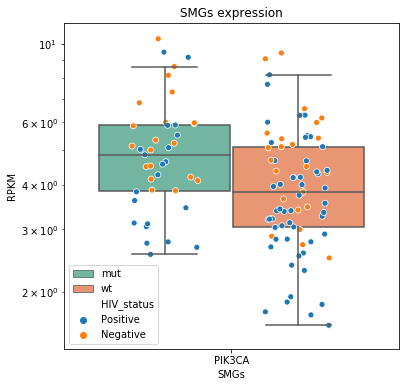

In [18]:
f, ax = plt.subplots(figsize=(6,6))
s = sns.boxplot(x='gene', y='rpkm', data=dfpik, hue='mut_status', palette="Set2", fliersize=0, ax=ax)

dfpik1 = dfpik[dfpik.mut_status=='mut']
dfpik1['xs'] = dfpik1['gene'].map(tlmap_dict) + np.random.uniform(0.0, 0.2, size=dfpik1.shape[0])
dfpik2 = dfpik[dfpik.mut_status=='wt']
dfpik2['xs'] = dfpik2['gene'].map(tlmap2_dict) + np.random.uniform(0.0, 0.2, size=dfpik2.shape[0])

dfc = pd.concat([dfpik1, dfpik2])

sns.scatterplot(x='xs', y='rpkm', data=dfc, hue='HIV_status', x_jitter=True) # jitter does not work


ax.set_yscale('log')
ax.set_xlabel('SMGs')
ax.set_ylabel('RPKM')
ax.set_title('SMGs expression')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/PIK3CA_expression_boxlot_20190703.pdf'
plt.savefig(of, bbox_inches='tight', dpi=200)
plt.show()

### pik3ca expression hiv + vs -

In [19]:
dfpik = dfm[dfm.gene == 'PIK3CA']

In [20]:
dfpik.head(2)

,patient,gene,rpkm,HIV_status,mut_status
7,HTMCP-03-06-02001,PIK3CA,9.4726,Positive,mut
19,HTMCP-03-06-02002,PIK3CA,10.3312,Negative,mut


In [80]:
pikpos = dfpik[dfpik.HIV_status == 'Positive']['rpkm']
pikneg = dfpik[dfpik.HIV_status == 'Negative']['rpkm']
pikneg.mean()/pikpos.mean()
pikneg.mean()
pikpos.mean()
ttest_ind(pikpos, pikneg)

1.3036023307300206

5.216815555555556

4.001845833333334

Ttest_indResult(statistic=-3.7675181642219853, pvalue=0.0002616510014298256)

In [14]:
pikpos = dfpik[(dfpik.HIV_status == 'Positive')&(dfpik.mut_status == 'mut')]['rpkm']
pikneg = dfpik[(dfpik.HIV_status == 'Negative')&(dfpik.mut_status == 'mut')]['rpkm']

pikneg.mean()/pikpos.mean()

ttest_ind(pikpos, pikneg)

1.267140317758794

Ttest_indResult(statistic=-2.1109499754220993, pvalue=0.041239497374087296)

In [76]:
pikpos = dfpik[(dfpik.HIV_status == 'Positive')]['rpkm']
pikneg = dfpik[(dfpik.HIV_status == 'Negative')]['rpkm']

pikneg.mean()/pikpos.mean()

ttest_ind(pikpos, pikneg)

1.3036023307300206

Ttest_indResult(statistic=-3.7675181642219853, pvalue=0.0002616510014298256)

In [78]:
pikpos = dfpik[(dfpik.mut_status == 'mut')]['rpkm']
pikneg = dfpik[(dfpik.mut_status == 'wt')]['rpkm']

pikneg.mean()/pikpos.mean()

ttest_ind(pikpos, pikneg)

0.8018396972340047

Ttest_indResult(statistic=3.0304686958514067, pvalue=0.0030166371261496844)

In [27]:
dfpik.head(2)

,patient,gene,rpkm,HIV_status,mut_status
7,HTMCP-03-06-02001,PIK3CA,9.4726,Positive,mut
19,HTMCP-03-06-02002,PIK3CA,10.3312,Negative,mut


# plot by hiv status

In [29]:
# exclude the hiv status unknown case
dfpik = dfpik.query('HIV_status !="Unknown"')

In [34]:
sns.boxplot?

In [63]:
ticks = ax.get_xticks()
labels = [ t.get_text() for t in ax.get_xticklabels()]
tlmap_dict = {k:v for v, k in zip(ticks-0.1, labels)}
tlmap2_dict = {k:v for v, k in zip(ticks-.1, labels)}

In [54]:
tlmap_dict
tlmap2_dict

{'Positive': 0, 'Negative': 1}

{'Positive': 0, 'Negative': 1}

Text(0.5, 0, '')

Text(0, 0.5, 'RPKM')

Text(0.5, 1.0, 'PIK3CA expression')

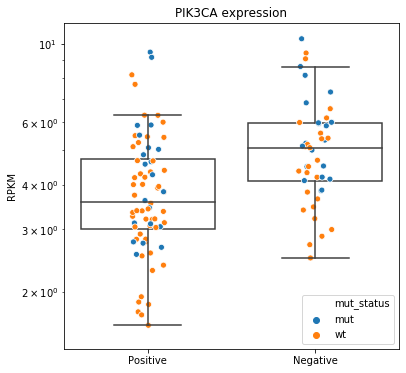

In [71]:
# run the above cell to get ticks
f, ax = plt.subplots(figsize=(6,6))
# s = sns.boxplot(x='gene', y='rpkm', data=dfpik, hue='HIV_status', palette="Set2", fliersize=0, ax=ax)
s = sns.boxplot(x='HIV_status', y='rpkm', data=dfpik, fliersize=0, ax=ax)
# Change the appearance of that box
mybox = ax.artists[1]
mybox.set_facecolor('white')
mybox = ax.artists[0]
mybox.set_facecolor('white')
# mybox.set_edgecolor('gray')
# sns.swarmplot('HIV_status', 'rpkm', data=dfpik, ax=ax)
dfpik1 = dfpik[dfpik.HIV_status=='Positive']
dfpik1['xs'] = dfpik1['HIV_status'].map(tlmap_dict) + np.random.uniform(0.0, 0.2, size=dfpik1.shape[0])
dfpik2 = dfpik[dfpik.HIV_status=='Negative']
dfpik2['xs'] = dfpik2['HIV_status'].map(tlmap2_dict) + np.random.uniform(0.0, 0.2, size=dfpik2.shape[0])

dfc = pd.concat([dfpik1, dfpik2])

sns.scatterplot(x='xs', y='rpkm', data=dfc, hue='mut_status', x_jitter=True) # jitter does not work


ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('RPKM')
ax.set_title('PIK3CA expression')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/PIK3CA_expression_boxlot_hivpos_vs_neg_20190807.pdf'
plt.savefig(of, bbox_inches='tight', dpi=150)
plt.show()

In [79]:
dfpik.sort_values('rpkm', ascending=False).head()

,patient,gene,rpkm,HIV_status,mut_status
19,HTMCP-03-06-02002,PIK3CA,10.3312,Negative,mut
7,HTMCP-03-06-02001,PIK3CA,9.4726,Positive,mut
115,HTMCP-03-06-02037,PIK3CA,9.4182,Negative,wt
1195,HTMCP-03-06-02344,PIK3CA,9.1595,Positive,mut
607,HTMCP-03-06-02175,PIK3CA,9.0705,Negative,wt


Text(0.5, 0, 'SMGs')

Text(0, 0.5, 'RPKM')

Text(0.5, 1.0, 'SMGs expression')

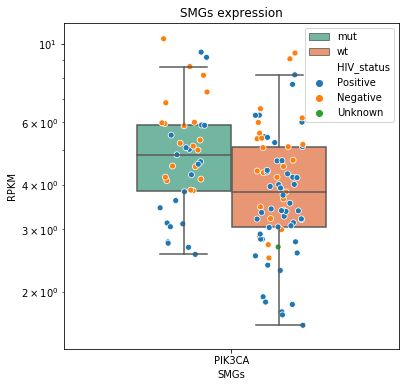

In [26]:
f, ax = plt.subplots(figsize=(6,6))
s = sns.boxplot(x='gene', y='rpkm', data=dfpik, hue='mut_status', palette="Set2", fliersize=0, ax=ax)

dfpik1 = dfpik[dfpik.mut_status=='mut']
dfpik1['xs'] = dfpik1['gene'].map(tlmap_dict) + np.random.uniform(0.0, 0.2, size=dfpik1.shape[0])
dfpik2 = dfpik[dfpik.mut_status=='wt']
dfpik2['xs'] = dfpik2['gene'].map(tlmap2_dict) + np.random.uniform(0.0, 0.2, size=dfpik2.shape[0])

dfc = pd.concat([dfpik1, dfpik2])

sns.scatterplot(x='xs', y='rpkm', data=dfc, hue='HIV_status', x_jitter=True) # jitter does not work


ax.set_yscale('log')
ax.set_xlabel('SMGs')
ax.set_ylabel('RPKM')
ax.set_title('SMGs expression')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/PIK3CA_expression_boxlot_20190703.pdf'
# plt.savefig(of, bbox_inches='tight', dpi=200)
plt.show()

In [25]:
ticks = ax.get_xticks()
labels = [ t.get_text() for t in ax.get_xticklabels()]


tlmap_dict = {k:v for v, k in zip(ticks-.3, labels)}
tlmap2_dict = {k:v for v, k in zip(ticks+.1, labels)}

Text(0.5,0,'SMGs')

Text(0,0.5,'RPKM')

Text(0.5,1,'SMGs expression')

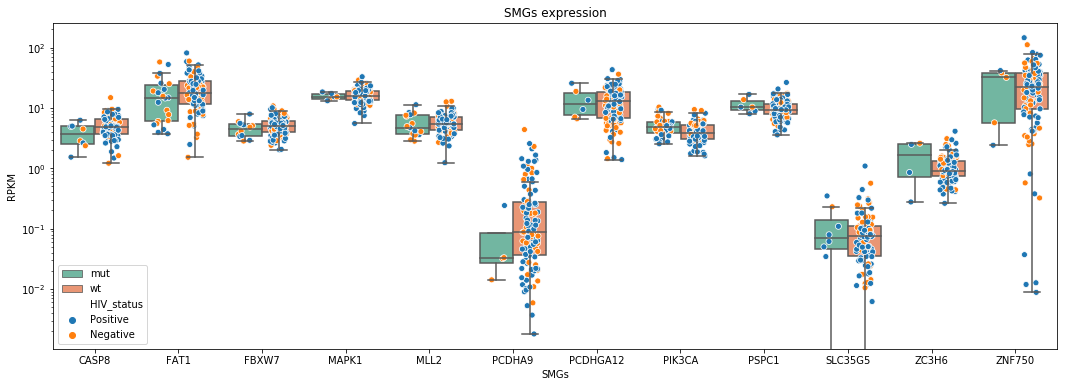

In [324]:
f, ax = plt.subplots(figsize=(18,6))
s = sns.boxplot(x='gene', y='rpkm', data=dfm, hue='mut_status', palette="Set2", fliersize=0, ax=ax)

dfm1 = dfm[dfm.mut_status=='mut']
dfm1['xs'] = dfm1['gene'].map(tlmap_dict) + np.random.uniform(0.0, 0.2, size=dfm1.shape[0])
dfm2 = dfm[dfm.mut_status=='wt']
dfm2['xs'] = dfm2['gene'].map(tlmap2_dict) + np.random.uniform(0.0, 0.2, size=dfm2.shape[0])

dfc = pd.concat([dfm1, dfm2])

sns.scatterplot(x='xs', y='rpkm', data=dfc, hue='HIV_status', x_jitter=True) # jitter does not work


ax.set_yscale('log')
ax.set_xlabel('SMGs')
ax.set_ylabel('RPKM')
ax.set_title('SMGs expression')

of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/SMGs_expression_boxlot_20190610.pdf'
# plt.savefig(of, bbox_inches='tight', dpi=300)
plt.show()

### use plotly

In [323]:
status = dfm.mut_status.unique()
data = []

for s in status:
    df = dfm[dfm.mut_status==s]
    y=df['rpkm']
    x=df['gene']
    b = go.Box(y=y, 
             x=x,
             name=s, 
             boxpoints='all',
                    pointpos = 0, 
             jitter=.5,              
             text=df['patient'])
    data.append(b)

layout=go.Layout(title='SMGs expression',
                width=1200,
                height=400,
                yaxis=dict(type='log', autorange=True, title='RPKM'),
                boxgroupgap=0.1,
                boxgap=0.2,
                boxmode='group')

fig = go.Figure(data=data, layout=layout)

iplot(fig) 

### plot all genes

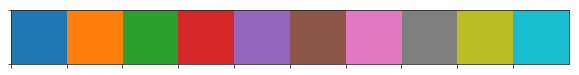

In [39]:
# default 10 plotly colors 
clrs = [
'#1f77b4',  # muted blue
'#ff7f0e',  # safety orange
'#2ca02c',  # cooked asparagus green
'#d62728',  # brick red
'#9467bd',  # muted purple
'#8c564b',  # chestnut brown
'#e377c2',  # raspberry yogurt pink
'#7f7f7f',  # middle gray
'#bcbd22',  # curry yellow-green
'#17becf'   # blue-teal
]
sns.palplot(clrs)

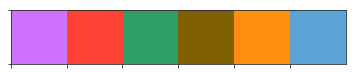

In [99]:
# colors = [rgba(93, 164, 214, 0.5), rgba(255, 144, 14, 0.5), rgba(44, 160, 101, 0.5), rgba(255, 65, 54, 0.5), rgba(207, 114, 255, 0.5), rgba(127, 96, 0, 0.5)]
colors = ['#CF72FF','#FF4136','#2CA065','#7F6000','#FF900E','#5DA4D6']
sns.palplot(colors)

Text(0.5,0,'')

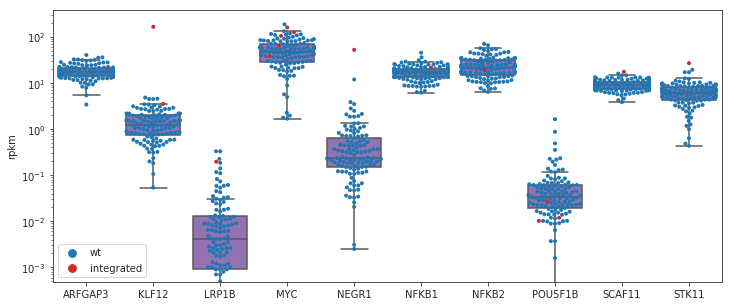

In [85]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
_ = ax.set_yscale('log')
sns.boxplot('gene', 'rpkm',  data=df2, fliersize=0, color=clrs[4])
sns.swarmplot('gene', 'rpkm',  data=df2, hue='integration', palette = [clrs[0], clrs[3]],
              size=4)
ax.legend(loc='lower left')
ax.set_xlabel('')
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/integration/integration_expression_box_swarmplot.pdf'
plt.savefig(of, bbox_inches='tight', dpi=300)
plt.show()